# 1. EXPLORATORY ANALYSIS
---

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from pylab import *
import warnings
warnings.filterwarnings('ignore')

---
# Table of contents
1. [Description of the dataset](#intro)
    1. [ Variable types](#intro2)
    2. [ Variable description ](#intro3)
2. [Variable representation](#ci)
    1. [Plots of continuous variables](#ci3)
    2. [Plots of discrete variables](#ci4)
    3. [Identification of outliers](#ci5)
---

We proceed to import the database, in which we have 7 variables
+ **age**: shows the age of the person
+ **gender**: if the person is male or female
+ **bmi**: body mass index, it is the weight of a person in kilograms (or pounds) divided by the square of the height in meters (or feet)
+ **children**: the number of children a person has
+ **region**: the region you live in
+ **charges**: the charges of the person

In [20]:
data = pd.read_csv('data/insurance.csv', sep=",", header=0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1.1 Description of the dataset <a name="intro"></a>
---

Next we will explain what types of variables we have. First of all, if they are int64, object, or float. Secondly, if they are qualitative, discrete, continuous... And finally we will analyze the numerical variables with .describe().

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In our data frame we have 7 variables:
+ 2 'int64': age, children
+ 3 'object': sex, smoker, region
+ 2 'float64': loads, bmi


'int64' we mean numeric characters, and the 64 refers to the memory used to store the character.

'object' we mean a kind of tag or alias to refer to the object.
We transform variables of type 'object' to categorical in the next step.


'floats' we mean variables with real positive or negative numbers, that is, with decimals.

### Variable types <a name="intro2"></a>
---
Regarding the types of variables we have:
+ Age: discrete quantitative
+ Sex: dichotomous qualitative
+ Bmi: continuous quantitative
+ Children: discrete quantitative
+ Smoker: dichotomous qualitative
+ Region: qualitative categorical
+ Charges: continuous quantitative

In [22]:
data_objects = data.columns[data.dtypes == 'object'] #Saco todos los nombres de las columnas
data[data_objects] = data[data_objects].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Variable description <a name="intro3"></a>
---

In [23]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


First of all we can see that we have the same number of observations for all variables (1338), which means that there are no missing values

Regarding the variable **age**, we have a minimum age of 18, and a maximum age of 64, so we are dealing with people who are of legal age. The average is 39 years.

In second place we have the variable **bmi** which has a minimum of 15.96 and a maximum of 53.13. Bearing in mind that a person with a bmi of 18.5 to 24.9 is within a normal or healthy weight range, and the average is 30, we are talking about a group of people who are mostly in overweight.

Thirdly, we have the variable **children** that has a minimum of 0 and a maximum of 5, which is quite normal, whether it is having from 0 to 5 children.

In fourth and last place we have the **charges** variable whose minimum is 1121.87 and maximum is 63770.42, with an average of 13270.42. They are quite normal values.

### Missing data
---

We do not have any missing value in any of the variables, something normal considering that in the previous point we have seen that the maximum and minimum values were not far from the rest of the values of the sample.

Having no missing values, it is not necessary to treat them, therefore we proceed to the next point.

In [24]:
print("Are there values NaN?:\n",data.isnull().values.any())
print("Attributes values NaN :\n",data.isnull().sum())
print("Total number of NaN:\n",data.isnull().sum().sum())

Are there values NaN?:
 False
Attributes values NaN :
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Total number of NaN:
 0


## 1.2 VARIABLE REPRESENTATION <a name="ci"></a>

### 1.2.1.- Plots of continuous variables <a name="ci3"></a>

+ There are 4 continuous variables, `AGE`, `CHARGES`, `BMI` and `CHILDREN`

### `Histogram`

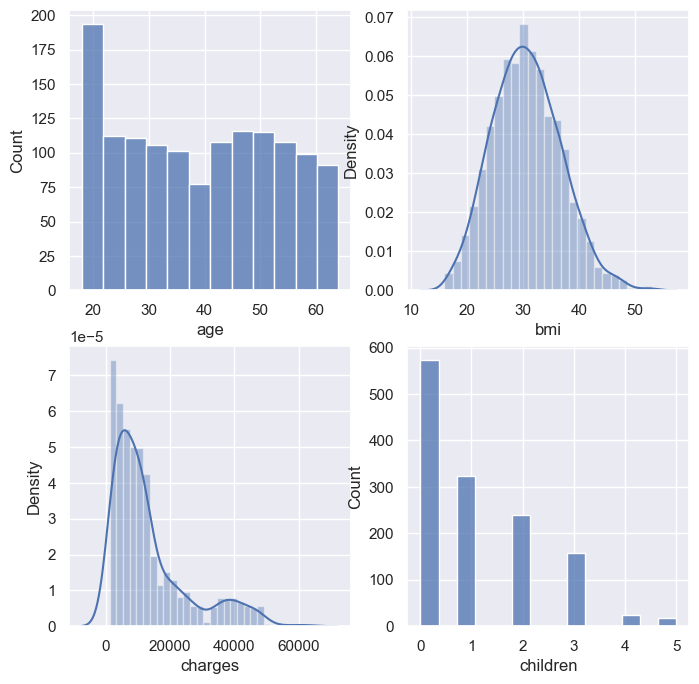

In [25]:
sns.set(rc={"figure.figsize": (8, 8)})
subplot(2,2,1)
ax = sns.histplot(data.age)
subplot(2,2,2)
ax = sns.distplot(data.bmi)
subplot(2,2,3)
ax = sns.distplot(data.charges)
subplot(2,2,4)
ax = sns.histplot(data.children)
plt.show()


### AGE

+ We can see that the most common age is around 20 years old, up to 60 years old.


### BMI
+ It follows a normal distribution, it presents a symmetrical form.


### CHILDREN
+ Most people do not have children, and then the most normal thing is to have a child.


### CHARGES
+ We see that the combination between the density curve and the histogram is not symmetrical, it presents an asymmetry to the left.

---
### `BoxPlot`:

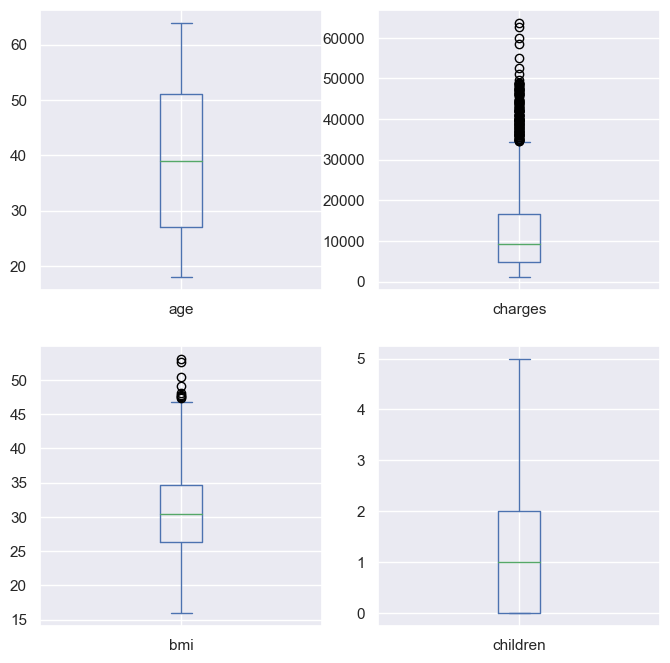

In [26]:
ax = data.loc[:, ["age","charges","bmi","children"]].plot.box(
    subplots=True, layout=(2,2), sharex=False, sharey=False)

### AGE

+ The mean is 39.20, the first quartile is 27.00, the second quartile is 39.99 and the third quartile is 51.00.

+ There are any outliers in this variable

### BMI
+ The **mean** is 30.66, the first quartile is 26.29, the **second quartile** is 30.40 and the **third quartile** is 34.69.

+ There are upper outliers in this variable

### CHILDREN
+ The mean is 0, the first quartile is 0.00, the second quartile is 1.00 and the third quartile is 2.00.

+ There are any outliers in this variable

### CHARGES
+ The **mean** is 13270.4222, the **first quartile** is 4740.2871, the **second quartile** is 9382.0330 and the **third quartile** is 16639.9125.

+ There are upper outliers in this variable

  
### 1.2.2.- Plot of discrete variables  <a name="ci4"></a>
  ---
  - For factors :  
    - Frecuency tables (absolute and relative).
    - Grafics 

    


  - We have 3 discrete variables in this dataset: **sex**, **region** and **smoker**.

## Frecuency tables: 
---

### SEX
+ Insurace's primary beneficiary gender (female or male)

In [27]:
data['sex'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

The `sex` variable can take two values: 'female' and 'male'

In [28]:
AbsFreq_Sex = data['sex'].value_counts().sort_index()
AbsFreq_Sex

female    662
male      676
Name: sex, dtype: int64

There are 662 `female` and 676 `male`.

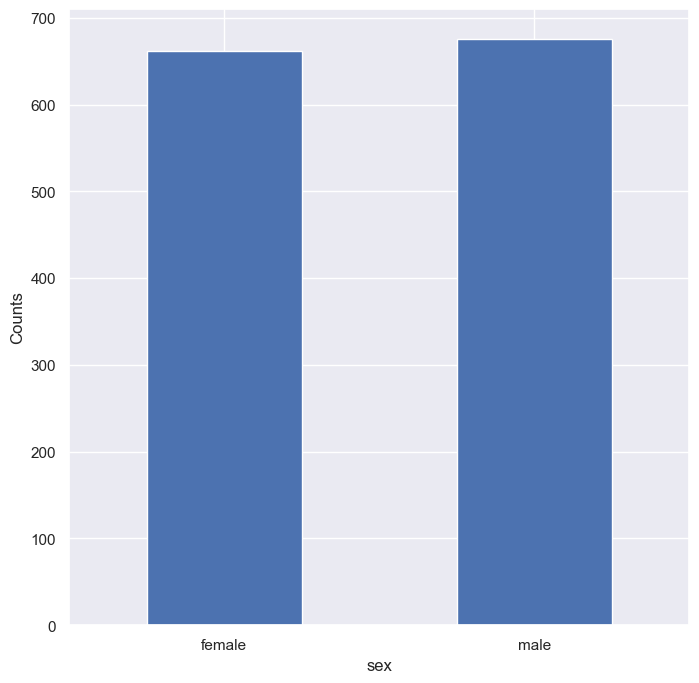

In [29]:
plot = AbsFreq_Sex.plot.bar(rot=0, xlabel='sex', ylabel ='Counts')

In [30]:
RelFreq_Sex = data['sex'].value_counts(normalize=True).sort_index()
RelFreq_Sex

female    0.494768
male      0.505232
Name: sex, dtype: float64

#### Probabilities
---

+ The probability of being female is  0.494768
+ The probability of being male is  0.505232
+ This classes are balanced

---
### SMOKER
+ Whether the primary beneficiary is a current smoker or not

In [31]:
data['smoker'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

The `smoker` variable can take two values: 'yes' and 'no'

In [32]:
AbsFreq_Smoker = data['smoker'].value_counts().sort_index()
AbsFreq_Smoker

no     1064
yes     274
Name: smoker, dtype: int64

There are 1064 `no-smoker` and 274 `smoker`.

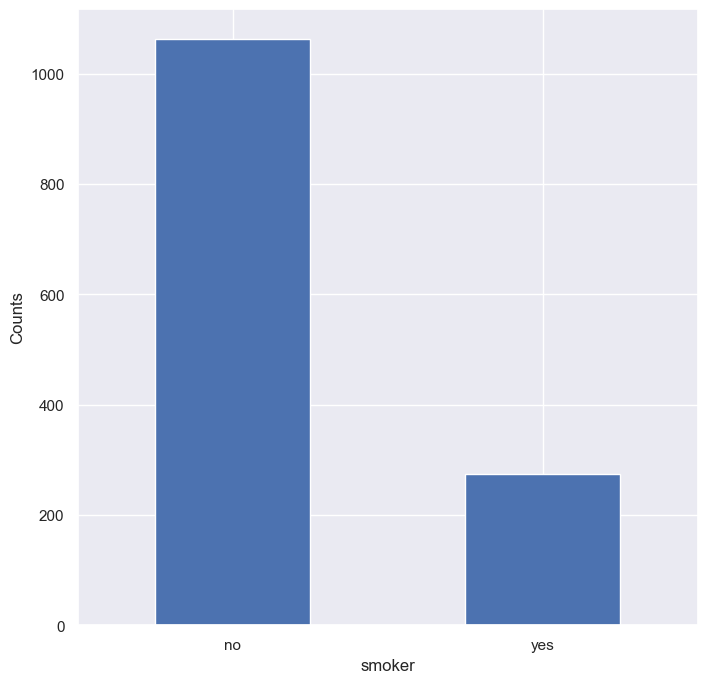

In [33]:
plot = AbsFreq_Smoker.plot.bar(rot=0, xlabel='smoker', ylabel ='Counts')

There are 1064 `non-smokers` and 274 `smokers` as we can see in the graph

In [34]:
RelFreq_Smoke = data['smoker'].value_counts(normalize=True).sort_index()
RelFreq_Smoke

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

#### Probabilities
---

+ The probability of being 'non-smoker' is  0.795217
+ The probability of being 'smoker' is  0.204783


---
### REGION
+ The primary beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

In [35]:
data['region'].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

The `region` variable can take two values: **southwest**, **southeast**, **northwest** and **northeast**

In [36]:
AbsFreq_Region = data['region'].value_counts().sort_index()
AbsFreq_Region

northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

#### Absolute Frequency
---

+ There are 324 of `northeast` 
+ There are 325 of `northwest` 
+ There are 364 of `southeast` 
+ There are 325 of `southwest` 

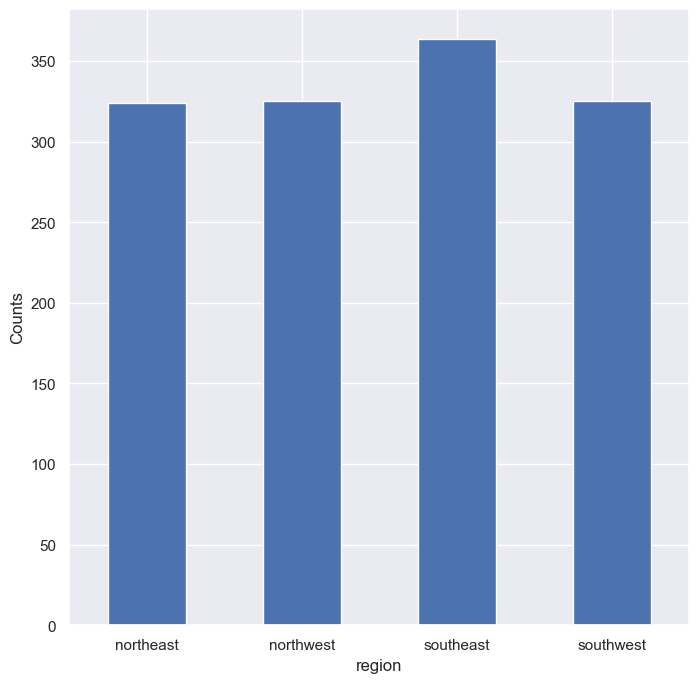

In [37]:
plot = AbsFreq_Region.plot.bar(rot=0, xlabel='region', ylabel ='Counts')

In [38]:
RelFreq_Region = data['region'].value_counts(normalize=True).sort_index()
RelFreq_Region

northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
Name: region, dtype: float64

#### Probabilities
---

+ The probability of live in 'northeast' is  0.242152
+ The probability of live in 'northwest' is  0.242900
+ The probability of live in 'southeast' is  0.272048
+ The probability of live in 'southwest' is  0.242900

## Identification of outliers <a name="ci5"></a>
---

In [39]:
# FUNCIÓN PARA OBTENER OUTLIERS
def outliers (datos):
    df_iqr = stats.iqr(datos)
    print(f"Interquartile range: {df_iqr}")
    # Para localizar el primer y tercer cuartil.
    df_q1, df_q3 = np.quantile(datos, [0.25, 0.75])
 
    # Limites de los valores atípicos
    cut_low = df_q1 - 1.5 * df_iqr
    cut_high = df_q3 + 1.5 * df_iqr
 
    print("Lower and upper outlier limits:", cut_low, ", ", cut_high)
 
    # Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
    df_outliers = data.loc[(datos < cut_low) | (datos > cut_high)]

    # Representación mediante boxpots (sección gráficos)

    print('We have a total of', len(df_outliers), 'outliers')

    return df_outliers

## AGE

In [40]:
# Outliers
age_outl = outliers(data.age)
age_outl

Interquartile range: 24.0
Lower and upper outlier limits: -9.0 ,  87.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


## BMI

In [41]:
# Outliers
bmi_outl = outliers(data.bmi)
bmi_outl

Interquartile range: 8.3975
Lower and upper outlier limits: 13.7 ,  47.290000000000006
We have a total of 9 outliers


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


+ There are 9 outliers in this variable, as we can see in the boxplot

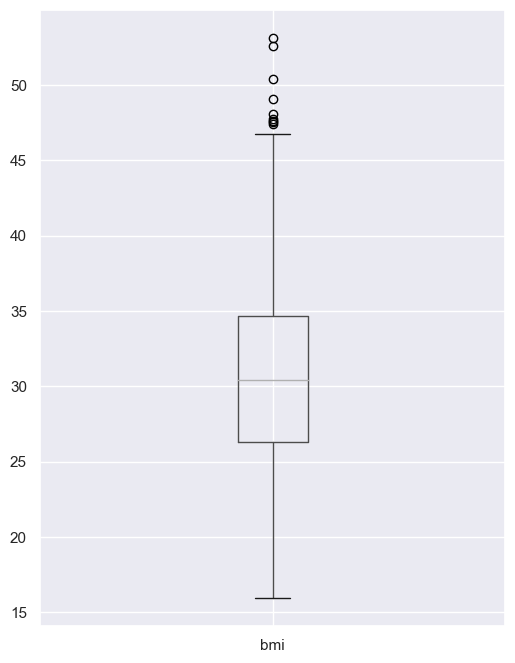

In [42]:
getPlot = data.boxplot(column='bmi', figsize=(6, 8))

## CHILDREN

In [43]:
# Outliers
children_outl = outliers(data.children)
children_outl

Interquartile range: 2.0
Lower and upper outlier limits: -3.0 ,  5.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


## CHARGES

In [44]:
# Outliers
charges_outl = outliers(data.charges)
charges_outl

Interquartile range: 11899.625365
Lower and upper outlier limits: -13109.1508975 ,  34489.350562499996
We have a total of 139 outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


+ There are 139 outliers in this variable, as we can see in the boxplot

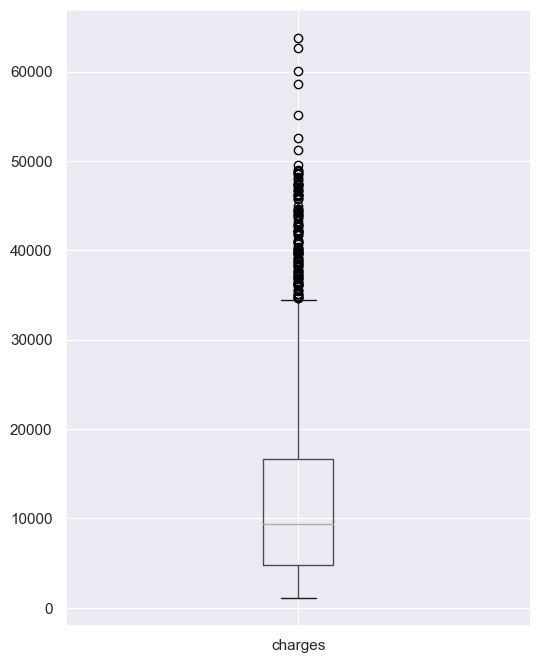

In [45]:
getPlot = data.boxplot(column='charges', figsize=(6, 8))